In [417]:
import pandas as pd
df=pd.read_csv('heartdisease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


Data Set Information:
    This database contains 14 attributes. In particular, the Cleveland database is the only one that has been used by ML researchers to
    this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)

Attribute Information:
    
    1.age: age in years
    2.sex: sex (1 = male; 0 = female)
    3.cp: chest pain type
      Value 1: typical angina
      Value 2: atypical angina
      Value 3: non-anginal pain
      Value 4: asymptomatic 
    4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    5.chol: serum cholestoral in mg/dl
    6.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    7.restecg: resting electrocardiographic results
      Value 0: normal
      Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    8.thalach: maximum heart rate achieved
    9.exang: exercise induced angina (1 = yes; 0 = no)
    10.oldpeak = ST depression induced by exercise relative to rest
    11.slope: the slope of the peak exercise ST segment
      Value 1: upsloping
      Value 2: flat
      Value 3: downsloping
    12.ca: number of major vessels (0-3) colored by flourosopy
    13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    14.num: diagnosis of heart disease (angiographic disease status)
      Value 0: < 50% diameter narrowing
      Value 1: > 50% diameter narrowing      

In [418]:
df.shape

(200, 14)

In [419]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [420]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

5 int datatypes columns and 9 object datatypes columns in dataframe

In [421]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

No null values in dataframe

From above dataframe we can see there are lot of ? signs present so I will first convert them to NAN values then I will impute with the help of SimpleImputer

In [422]:
import numpy as np
data=df.replace('?',np.NAN)

In [423]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [424]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


maximum 198 null values are present in ca column followed by thal and slope columns

In [426]:
data.drop(columns=['ca'],axis=1,inplace=True)

In [427]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NAN,strategy='mean')
imp=imp.fit(data)
New_Data=imp.transform(data.values)
New_Data=pd.DataFrame(New_Data,columns=data.columns)
New_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63.0,1.0,4.0,140.000000,260.0,0.0,1.0,112.000000,1.000000,3.000000,2.000000,6.294118,2.0
1,44.0,1.0,4.0,130.000000,209.0,0.0,1.0,127.000000,0.000000,0.000000,2.132653,6.294118,0.0
2,60.0,1.0,4.0,132.000000,218.0,0.0,1.0,140.000000,1.000000,1.500000,3.000000,6.294118,2.0
3,55.0,1.0,4.0,142.000000,228.0,0.0,1.0,149.000000,1.000000,2.500000,1.000000,6.294118,1.0
4,66.0,1.0,3.0,110.000000,213.0,1.0,2.0,99.000000,1.000000,1.300000,2.000000,6.294118,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,2.132653,6.294118,1.0
196,62.0,1.0,1.0,133.763889,139.0,0.0,1.0,122.795918,0.646259,1.320833,2.132653,6.294118,0.0
197,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,2.132653,6.000000,2.0
198,58.0,1.0,4.0,133.763889,385.0,1.0,2.0,122.795918,0.646259,1.320833,2.132653,6.294118,0.0


In [428]:
cor=New_Data.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
age,1.000000,0.034230,-0.038280,0.181584,0.066972,0.124753,0.002400,-0.149949,0.135050,0.157087,0.100039,0.084672,0.287289
sex,0.034230,1.000000,0.038036,0.012585,-0.096150,-0.055341,0.060621,-0.001592,0.016538,0.097267,0.088087,-0.078866,0.147470
cp,-0.038280,0.038036,1.000000,0.074638,0.065818,-0.047368,0.034790,-0.123597,0.181907,0.040155,0.028605,0.055794,0.168210
trestbps,0.181584,0.012585,0.074638,1.000000,0.150192,0.184605,0.092042,-0.013046,0.220327,0.115432,0.091688,0.082839,0.141719
chol,0.066972,-0.096150,0.065818,0.150192,1.000000,0.151512,0.024257,-0.041209,0.087302,0.002160,0.058552,-0.071654,0.076444
fbs,0.124753,-0.055341,-0.047368,0.184605,0.151512,1.000000,0.165927,0.051405,-0.213312,-0.099321,0.016262,0.026280,0.050515
restecg,0.002400,0.060621,0.034790,0.092042,0.024257,0.165927,1.000000,0.012348,-0.080575,-0.106991,-0.019306,0.052624,-0.032800
thalach,-0.149949,-0.001592,-0.123597,-0.013046,-0.041209,0.051405,0.012348,1.000000,-0.075057,0.172048,-0.122213,-0.203311,-0.079077
exang,0.135050,0.016538,0.181907,0.220327,0.087302,-0.213312,-0.080575,-0.075057,1.000000,0.309593,0.109706,0.122742,0.254926
oldpeak,0.157087,0.097267,0.040155,0.115432,0.002160,-0.099321,-0.106991,0.172048,0.309593,1.000000,0.226364,0.090996,0.378209


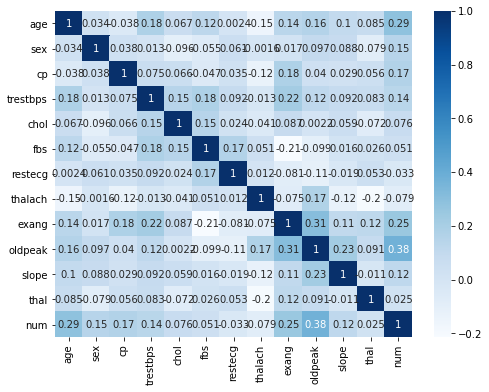

In [429]:
plt.figure(figsize=(8,6))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor,annot=True,cmap='Blues')

From above heatmap we observe that target is comparatively good correlated with oldpeak,age and exang columns whereas it is negatively correlated with restecg 

Summary Statistics

In [430]:
New_Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,6.294118,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.470440,0.683455,18.835692,0.410940,0.937755,0.466331,0.526001,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,6.294118,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,0.646259,1.320833,2.132653,6.294118,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.132653,6.294118,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,7.000000,4.000000


From above summary statistics we observe that in chol column there is maximum difference between Q3 and max also the standard deviation is highest amongst all the attributes. Since median(50%) is higher than the mean, it has left skew(negative) curve.

Bi-Variate Analysis

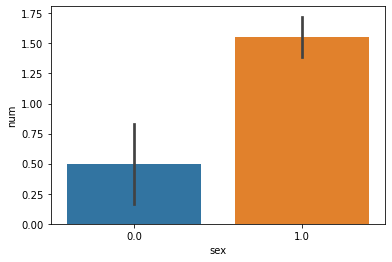

In [490]:
sns.barplot(x='sex',y='num',data=New_Data)
plt.show()

from above plot males have high proportion with Heart Disease

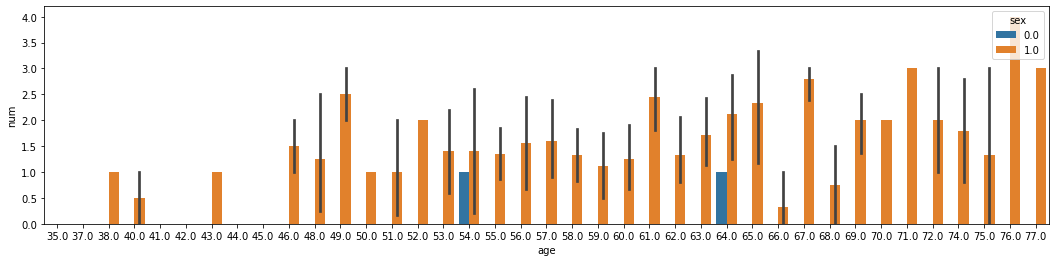

In [496]:
plt.figure(figsize=(18,4))
sns.barplot(x='age',y='num',hue='sex',data=New_Data)
plt.show()

Uni-Variate Analysis

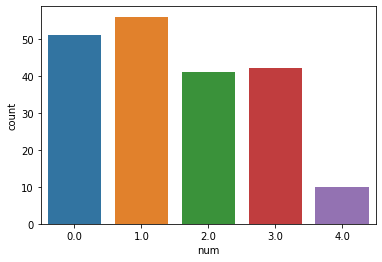

In [500]:
sns.countplot(New_Data['num'])
plt.show()

From above plot we observe that 1st level and 4th level heart disease are highest and lowest respectively

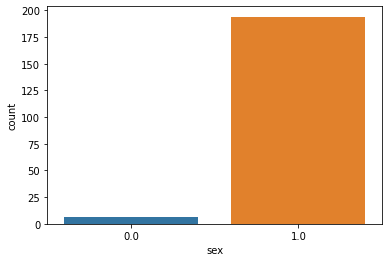

In [498]:
sns.countplot(New_Data['sex'])
plt.show()

From above plot there are approx 190 males and more than 5 females in sex column

Detecting Outliers

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trestbps    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalach           AxesSubplot(0.125,0.125;0.0945122x0.343182)
exang          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
slope          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
thal           AxesSubplot(0.578659,0.125;0.0945122x0.343182)
num            AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

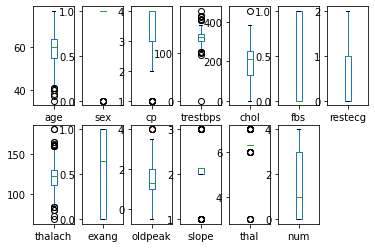

In [501]:
New_Data.plot(kind='box',subplots=True,layout=(2,7))

From above boxplots we observe there are high no of outliers present in age,thalach,trestbps columns

Removing Outliers

In [431]:
from scipy.stats import zscore
z=np.abs(zscore(New_Data))
df_new=New_Data[(z<3).all(axis=1)]

In [432]:
New_Data.shape

(200, 13)

In [433]:
df_new.shape

(177, 13)

Preprocessing,Normalization and Standardization of data before Modelling

In [434]:
df_new.replace([np.inf,-np.inf],np.NAN).dropna(axis=0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63.0,1.0,4.0,140.000000,260.0,0.0,1.0,112.000000,1.000000,3.000000,2.000000,6.294118,2.0
1,44.0,1.0,4.0,130.000000,209.0,0.0,1.0,127.000000,0.000000,0.000000,2.132653,6.294118,0.0
2,60.0,1.0,4.0,132.000000,218.0,0.0,1.0,140.000000,1.000000,1.500000,3.000000,6.294118,2.0
3,55.0,1.0,4.0,142.000000,228.0,0.0,1.0,149.000000,1.000000,2.500000,1.000000,6.294118,1.0
4,66.0,1.0,3.0,110.000000,213.0,1.0,2.0,99.000000,1.000000,1.300000,2.000000,6.294118,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,53.0,1.0,4.0,144.000000,300.0,1.0,1.0,128.000000,1.000000,1.500000,2.000000,6.294118,3.0
193,62.0,1.0,4.0,158.000000,170.0,0.0,1.0,138.000000,1.000000,0.000000,2.132653,6.294118,1.0
197,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,2.132653,6.000000,2.0
198,58.0,1.0,4.0,133.763889,385.0,1.0,2.0,122.795918,0.646259,1.320833,2.132653,6.294118,0.0


In [435]:
df_new.skew()

age        -0.258590
sex         0.000000
cp         -1.439012
trestbps    0.509657
chol       -0.537742
fbs         0.686611
restecg     0.366437
thalach    -0.105998
exang      -0.827606
oldpeak     0.424375
slope      -0.170886
thal        2.079564
num         0.259635
dtype: float64

In [436]:
x=df_new.drop('num',axis=1)

In [437]:
y=df_new['num']

In [438]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df_x=pt.fit_transform(x)
df_x=pd.DataFrame(df_x)

In [439]:
df_x.skew()

0     0.016604
1     0.000000
2    -0.899550
3     0.000000
4    -0.932308
5     0.602277
6    -0.028858
7     0.037263
8    -0.492940
9    -0.041873
10    0.096222
11   -0.034073
dtype: float64

In [440]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(df_x)
df_x=pd.DataFrame(df_x)

Hyper parameter tuning

In [444]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
max_acc_score=0.40
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
    dtc=DecisionTreeClassifier()
    svc=SVC()
    knc=KNeighborsClassifier()
    model=[dtc,svc,knc]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state        
            print('max accuracy score corresponding to ',m,'for',final_r_state,'is',max_acc_score)

max accuracy score corresponding to  SVC() for 43 is 0.5


In [445]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=43,test_size=0.20)

In [446]:
print(x_train.shape,'\t',x_test.shape)

(141, 12) 	 (36, 12)


In [447]:
print(y_train.shape,'\t',y_test.shape)

(141,) 	 (36,)


Finding best model at given parameter

In [448]:
model=[dtc,svc,knc]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion matrix:',confusion_matrix(y_test,y_pred))
    print('classification report:',classification_report(y_test,y_pred))
    print('\n')

Score of DecisionTreeClassifier() is: 1.0
accuracy score: 0.3888888888888889
confusion matrix: [[3 2 1 0 0]
 [5 4 0 3 0]
 [1 1 2 2 0]
 [1 3 2 5 0]
 [0 0 1 0 0]]
classification report:               precision    recall  f1-score   support

         0.0       0.30      0.50      0.37         6
         1.0       0.40      0.33      0.36        12
         2.0       0.33      0.33      0.33         6
         3.0       0.50      0.45      0.48        11
         4.0       0.00      0.00      0.00         1

    accuracy                           0.39        36
   macro avg       0.31      0.32      0.31        36
weighted avg       0.39      0.39      0.38        36



Score of SVC() is: 0.7163120567375887
accuracy score: 0.5
confusion matrix: [[4 1 1 0 0]
 [3 8 1 0 0]
 [0 1 2 3 0]
 [1 3 3 4 0]
 [0 1 0 0 0]]
classification report:               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         6
         1.0       0.57      0.67      0.62        

from above statistics we can see that SVC is performing better than other two models

Lets try GridSearchCV hyperparameter tuning to find out best parameters for the individual models

In [449]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
gd_sr=GridSearchCV(estimator=svc,param_grid=parameters,scoring='accuracy',cv=5)
gd_sr.fit(df_x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'C': 1, 'kernel': 'rbf'}
0.37317460317460316


In [450]:
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(df_x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.30999999999999994


In [451]:
grid_param={'n_neighbors':range(1,100)}
gd_sr=GridSearchCV(estimator=knc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(df_x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'n_neighbors': 32}
0.44603174603174595


passing parameters to models and re-evaluating the metrics

In [452]:
svc=SVC(C= 1,kernel='rbf')
dtc=DecisionTreeClassifier(criterion='gini')
knc=KNeighborsClassifier(n_neighbors=32)
model=[dtc,svc,knc]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion matrix:',confusion_matrix(y_test,y_pred))
    print('classification report:',classification_report(y_test,y_pred))

Score of DecisionTreeClassifier() is: 1.0
accuracy score: 0.3055555555555556
confusion matrix: [[2 3 1 0 0]
 [5 4 0 3 0]
 [1 1 1 3 0]
 [2 3 2 4 0]
 [0 0 1 0 0]]
classification report:               precision    recall  f1-score   support

         0.0       0.20      0.33      0.25         6
         1.0       0.36      0.33      0.35        12
         2.0       0.20      0.17      0.18         6
         3.0       0.40      0.36      0.38        11
         4.0       0.00      0.00      0.00         1

    accuracy                           0.31        36
   macro avg       0.23      0.24      0.23        36
weighted avg       0.31      0.31      0.30        36

Score of SVC(C=1) is: 0.7163120567375887
accuracy score: 0.5
confusion matrix: [[4 1 1 0 0]
 [3 8 1 0 0]
 [0 1 2 3 0]
 [1 3 3 4 0]
 [0 1 0 0 0]]
classification report:               precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         6
         1.0       0.57      0.67      0.62       

From above metric we observe that SVC model is performing better than other two

In [459]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(criterion='gini'),SVC(C=1),KNeighborsClassifier(n_neighbors=32)]
for m in model:
    mscores=cross_val_score(m,df_x,y,cv=5,scoring='accuracy')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[0.38888889 0.41666667 0.14285714 0.25714286 0.25714286]
mean score and standard deviation of DecisionTreeClassifier() is 0.29253968253968254 0.0996006133864087


[0.36111111 0.33333333 0.31428571 0.48571429 0.37142857]
mean score and standard deviation of SVC(C=1) is 0.37317460317460316 0.05978124226024313


[0.44444444 0.5        0.34285714 0.54285714 0.4       ]
mean score and standard deviation of KNeighborsClassifier(n_neighbors=32) is 0.44603174603174595 0.07078724435387292




At given parameters CVS of KN>SVC

In [468]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=43)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('classification_report:',(y_test,y_pred))

1.0
accuracy score: 0.5
confusion_matrix: [[5 1 0 0 0]
 [4 7 0 1 0]
 [0 1 3 2 0]
 [3 2 3 3 0]
 [0 0 1 0 0]]
classification_report: (74     3.0
178    3.0
18     0.0
10     0.0
186    3.0
114    1.0
127    2.0
2      2.0
44     4.0
105    3.0
118    3.0
20     2.0
88     1.0
31     3.0
0      2.0
42     3.0
152    1.0
61     2.0
40     3.0
149    3.0
11     1.0
89     1.0
1      0.0
73     3.0
41     1.0
168    2.0
150    0.0
163    3.0
199    1.0
104    0.0
164    1.0
153    1.0
147    1.0
60     0.0
106    1.0
13     1.0
Name: num, dtype: float64, array([0., 2., 0., 0., 3., 1., 2., 2., 2., 2., 2., 1., 3., 3., 3., 1., 1.,
       2., 0., 0., 0., 0., 0., 1., 1., 3., 0., 3., 0., 0., 1., 1., 1., 1.,
       1., 0.]))


In [470]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,df_x,y,cv=5,scoring='accuracy')
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.36111111 0.38888889 0.22857143 0.31428571 0.31428571]
0.3214285714285714 0.05449786818476759


In [476]:
from sklearn.ensemble import AdaBoostClassifier
model=[dtc,SVC(C=1)]
for m in model:
    ad=AdaBoostClassifier(base_estimator=m,n_estimators=100,learning_rate=0.1,random_state=43,algorithm='SAMME')
    ad.fit(x_train,y_train)
    print(m)
    print(ad.score(x_train,y_train))
    ad_pred=ad.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion_matrix:',confusion_matrix(y_test,y_pred))
    print('classification_report:',(y_test,y_pred))
    print('\n')

DecisionTreeClassifier()
1.0
accuracy score: 0.5
confusion_matrix: [[5 1 0 0 0]
 [4 7 0 1 0]
 [0 1 3 2 0]
 [3 2 3 3 0]
 [0 0 1 0 0]]
classification_report: (74     3.0
178    3.0
18     0.0
10     0.0
186    3.0
114    1.0
127    2.0
2      2.0
44     4.0
105    3.0
118    3.0
20     2.0
88     1.0
31     3.0
0      2.0
42     3.0
152    1.0
61     2.0
40     3.0
149    3.0
11     1.0
89     1.0
1      0.0
73     3.0
41     1.0
168    2.0
150    0.0
163    3.0
199    1.0
104    0.0
164    1.0
153    1.0
147    1.0
60     0.0
106    1.0
13     1.0
Name: num, dtype: float64, array([0., 2., 0., 0., 3., 1., 2., 2., 2., 2., 2., 1., 3., 3., 3., 1., 1.,
       2., 0., 0., 0., 0., 0., 1., 1., 3., 0., 3., 0., 0., 1., 1., 1., 1.,
       1., 0.]))


SVC(C=1)
0.2765957446808511
accuracy score: 0.5
confusion_matrix: [[5 1 0 0 0]
 [4 7 0 1 0]
 [0 1 3 2 0]
 [3 2 3 3 0]
 [0 0 1 0 0]]
classification_report: (74     3.0
178    3.0
18     0.0
10     0.0
186    3.0
114    1.0
127    2.0
2      2.0
44     

In [477]:
from sklearn.model_selection import cross_val_score
adscores=cross_val_score(ad,df_x,y,cv=5,scoring='accuracy')
print(adscores)
print(adscores.mean(),adscores.std())

[0.27777778 0.27777778 0.28571429 0.28571429 0.31428571]
0.28825396825396826 0.013491129752936997


From above ensembling techniques and CVS I observe that RF is performing comparatively better than other models

In [478]:
import joblib
file='Heartdiseaserfc.obj'
joblib.dump(rf,file)

['Heartdiseaserfc.obj']